# Importing Libraries

In [52]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# Reading Data

In [53]:
data = pd.read_csv('./data/jkuatStudents.csv')
print(data.shape)
data.tail()

(960, 55)


,studentId,school,current_sem,cs01,cs02,cs03,cs04,cs05,cs06,cs07,...,time_spent,ai_industry,cs_industry,da_industry,gd_industry,ho_industry,is_industry,na_industry,sd_industry,specialisation
955,1965,JKUAT,4.2,37.63,20.31,40,28.93,34.21,20.47,39.10,...,8,0,0,0,0,0,0,0,1,SD
956,1966,JKUAT,4.2,37.35,21.92,40,24.35,38.30,22.10,32.73,...,0,0,0,0,0,0,0,0,0,SD
957,1967,JKUAT,4.2,19.21,9.05,20,6.94,13.21,0.45,11.59,...,14,0,0,0,0,0,0,0,1,SD
958,1968,JKUAT,4.2,19.69,1.50,20,8.91,17.11,8.00,17.42,...,14,0,0,0,0,0,0,0,1,SD
959,1969,JKUAT,4.2,19.35,6.09,20,3.81,17.02,6.12,14.03,...,0,0,0,0,0,0,0,0,0,SD


# A bit of Pre-Processing

## Splitting Dataset

In [54]:
# Select main columns to be used in training
main_cols = data.columns.difference(['studentId', 'school', 'specialisation'])
X = data[main_cols]
y = data['specialisation']

In [55]:
X.columns

Index(['ai_industry', 'aspNet', 'c', 'c#', 'c++', 'cmake', 'cs01', 'cs02',
       'cs03', 'cs04', 'cs05', 'cs06', 'cs07', 'cs08', 'cs09', 'cs10', 'cs11',
       'cs12', 'cs13', 'cs14', 'cs15', 'cs16', 'cs17', 'cs18', 'cs_industry',
       'css', 'current_sem', 'da_industry', 'dart', 'gd_industry', 'go',
       'ho_industry', 'html', 'internships_no', 'is_industry', 'java',
       'javascript', 'jupyter', 'kotlin', 'na_industry', 'objective_c', 'php',
       'python', 'r', 'ruby', 'rust', 'scss', 'sd_industry', 'sql', 'swift',
       'time_spent', 'typescript'],
      dtype='object')

In [56]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)

(672, 52)
(288, 52)


In [57]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
# Encode the target variable
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

# Modelling

## Logistic Regression

In [59]:
# Define the hyperparameters to tune
parameters = {'C': [0.1, 1, 10]} # determines regularisation stretgth which helps prevent overfiting

# Create the Logistic Regression model
model_lr = LogisticRegression()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(model_lr, parameters, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Get the best model
best_model_lr = grid_search.best_estimator_

# Make predictions on the test set
y_pred_model_lr = best_model_lr.predict(X_test)

# Calculate evaluation metrics
accuracy_model_lr = accuracy_score(y_test, y_pred_model_lr)
f1_score_model_lr = f1_score(y_test, y_pred_model_lr, average='weighted')
cm_model_lr = confusion_matrix(y_test, y_pred_model_lr)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy : {round(accuracy_model_lr, 4)}")
print(f"F1 Score: {round(f1_score_model_lr, 4)}")
print(f"Confusion Matrix :")
print(cm_model_lr)


Best Parameters: {'C': 10}
Accuracy : 0.9132
F1 Score: 0.9178
Confusion Matrix :
[[38  0  0  0  0  0  0  0]
 [ 0 26  0  0  0  0  0  0]
 [ 0  4 40  0  0  0  0  0]
 [ 0  5  0 26  0  0  0  0]
 [ 0  1  0  1 41  0  1  0]
 [ 0  3  0  2  0 34  0  0]
 [ 0  3  0  0  0  0 25  0]
 [ 5  0  0  0  0  0  0 33]]


## Support Vecor Machine

In [60]:
# Define the hyperparameters to tune
parameters = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'rbf']}

# Create the model_SVM model
model_svm = SVC()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(model_svm, parameters, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Get the best model
best_model_svm = grid_search.best_estimator_

# Make predictions on the test set
y_pred_model_svm = best_model_svm.predict(X_test)

# Calculate evaluation metrics
accuracy_model_svm = accuracy_score(y_test, y_pred_model_svm)
f1_score_model_svm = f1_score(y_test, y_pred_model_svm, average='weighted')
cm_model_svm = confusion_matrix(y_test, y_pred_model_svm)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy : {round(accuracy_model_svm, 4)}")
print(f"F1 Score: {round(f1_score_model_svm, 4)}")
print(f"Confusion Matrix :")
print(cm_model_svm)

Best Parameters: {'C': 0.1, 'kernel': 'linear'}
Accuracy : 0.8819
F1 Score: 0.8989
Confusion Matrix :
[[34  4  0  0  0  0  0  0]
 [ 0 26  0  0  0  0  0  0]
 [ 0  4 40  0  0  0  0  0]
 [ 0  5  0 26  0  0  0  0]
 [ 0  6  0  0 36  0  2  0]
 [ 0  5  0  0  0 34  0  0]
 [ 0  3  0  0  0  0 25  0]
 [ 0  5  0  0  0  0  0 33]]


## Gradient Boosting

In [61]:
# Define the hyperparameters to tune
parameters = {'n_estimators': [100, 200, 300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [3, 5, 10]}

# Create the Gradient Boosting model
model_gb = GradientBoostingClassifier()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(model_gb, parameters, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Get the best model
best_model_gb = grid_search.best_estimator_

# Make predictions on the test set
y_pred_model_gb = best_model_gb.predict(X_test)

# Calculate evaluation metrics
accuracy_model_gb = accuracy_score(y_test, y_pred_model_gb)
f1_score_model_gb = f1_score(y_test, y_pred_model_gb, average='weighted')
cm_model_gb = confusion_matrix(y_test, y_pred_model_gb)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy : {round(accuracy_model_gb, 4)}")
print(f"F1 Score: {round(f1_score_model_gb, 4)}")
print(f"Confusion Matrix :")
print(cm_model_gb)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}
Accuracy : 0.9097
F1 Score: 0.9105
Confusion Matrix :
[[35  0  0  1  0  0  0  2]
 [ 0 24  1  0  0  0  1  0]
 [ 0  2 40  1  0  0  1  0]
 [ 0  1  0 27  0  1  0  2]
 [ 0  2  2  0 39  0  1  0]
 [ 1  1  1  0  0 35  1  0]
 [ 0  0  2  0  0  0 26  0]
 [ 2  0  0  0  0  0  0 36]]


## Random Forest

In [62]:
# Define the hyperparameters to tune
parameters = {'n_estimators': [100, 200, 300],
              'max_depth': [None, 5, 10]}

# Create the Random Forest model
model_rf = RandomForestClassifier()

# Pemodel_rform grid search to find the best hyperparameters
grid_search = GridSearchCV(model_rf, parameters, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Get the best model
best_model_rf = grid_search.best_estimator_

# Make predictions on the test set
y_pred_model_rf = best_model_rf.predict(X_test)

# Calculate evaluation metrics
accuracy_model_rf = accuracy_score(y_test, y_pred_model_rf)
f1_score_model_rf = f1_score(y_test, y_pred_model_rf, average='weighted')
cm_model_rf = confusion_matrix(y_test, y_pred_model_rf)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy : {round(accuracy_model_rf, 4)}")
print(f"F1 Score: {round(f1_score_model_rf, 4)}")
print(f"Confusion Matrix :")
print(cm_model_rf)


Best Parameters: {'max_depth': None, 'n_estimators': 200}
Accuracy : 0.9306
F1 Score: 0.9312
Confusion Matrix :
[[37  0  0  0  0  0  0  1]
 [ 0 26  0  0  0  0  0  0]
 [ 0  3 40  0  0  0  1  0]
 [ 0  0  2 27  0  1  1  0]
 [ 0  1  1  0 41  0  1  0]
 [ 0  1  2  0  0 36  0  0]
 [ 0  0  2  0  0  0 26  0]
 [ 3  0  0  0  0  0  0 35]]


## Random Forest Classifier

In [63]:
importances = best_model_rf.feature_importances_
indices = np.argsort(importances)

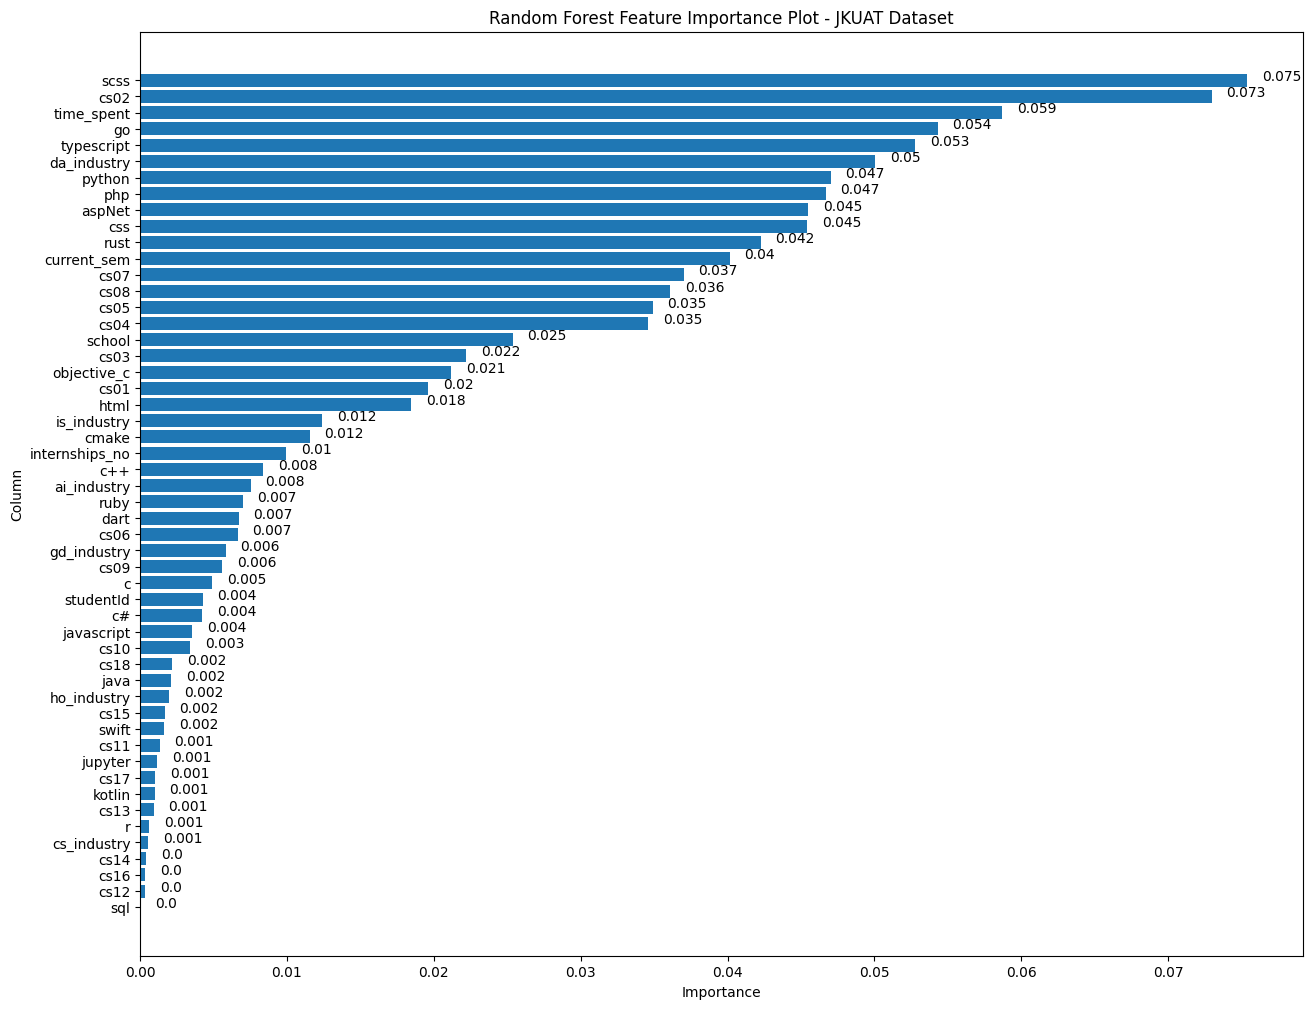

In [64]:
X_df = pd.DataFrame(X_train)

fig, ax = plt.subplots(figsize=(15, 12))
ax.barh(range(X_df.shape[1]), list(importances[indices]), align='center')
ax.set_yticks(range(X_df.shape[1]))
ax.set_yticklabels(data.columns[indices])
ax.set_xlabel('Importance')
ax.set_ylabel('Column')
ax.set_title('Random Forest Feature Importance Plot - JKUAT Dataset')

# Add the importance value at the end of each bar
for i, v in enumerate(importances[indices]):
    ax.text(v + 0.001, i, str(round(v, 3)))

plt.show()

# Exporting the Model

In [65]:
# save the trained classifier as a .pkl file
joblib.dump(best_model_rf, 'trainedModels/jkuatClassifier.pkl')

['trainedModels/jkuatClassifier.pkl']

# Make specialisation predictions on test data

In [66]:
# Create a new instance of student data to make predictions on
new_student = pd.DataFrame({
    'current_sem': [3.0],
    'cs01': [22.85],
    'cs02': [26.5],
    'cs03': [40],
    'cs04': [18.1],
    'cs05': [21.74],
    'cs06': [9.47],
    'cs07': [28.5],
    'cs08': [7.08],
    'cs09': [0],
    'cs10': [0],
    'cs11': [0],
    'cs12': [20],
    'cs13': [0],
    'cs14': [40],
    'cs15': [26.65],
    'cs16': [0],
    'cs17': [0],
    'cs18': [0],
    'academic_average': [23.72],
    'c': [0],
    'cmake': [0],
    'c++': [0],
    'java': [0],
    'javascript': [15],
    'python': [0],
    'r': [0],
    'jupyter': [0],
    'dart': [0],
    'kotlin': [0],
    'go': [0],
    'swift': [0],
    'c#': [0],
    'aspNet': [0],
    'typescript': [0],
    'php': [0],
    'objective_c': [0],
    'ruby': [0],
    'html': [76],
    'css': [9],
    'scss': [9],
    'sql': [0],
    'rust': [1],
    'internships_no': [0],
    'time_spent': [1],
    'ai_industry': [0],
    'cs_industry': [0],
    'da_industry': [0],
    'gd_industry': [0],
    'ho_industry': [0],
    'is_industry': [0],
    'na_industry': [0],
    'sd_industry': [1]
})
new_student = new_student[['ai_industry', 'aspNet', 'c', 'c#', 'c++', 'cmake', 'cs01', 'cs02',
       'cs03', 'cs04', 'cs05', 'cs06', 'cs07', 'cs08', 'cs09', 'cs10', 'cs11',
       'cs12', 'cs13', 'cs14', 'cs15', 'cs16', 'cs17', 'cs18', 'cs_industry',
       'css', 'current_sem', 'da_industry', 'dart', 'gd_industry', 'go',
       'ho_industry', 'html', 'internships_no', 'is_industry', 'java',
       'javascript', 'jupyter', 'kotlin', 'na_industry', 'objective_c', 'php',
       'python', 'r', 'ruby', 'rust', 'scss', 'sd_industry', 'sql', 'swift',
       'time_spent', 'typescript']]
new_student = scaler.transform(new_student)

In [67]:
# Get Student Prediction
preds = best_model_rf.predict(new_student)
preds = encoder.inverse_transform(preds)
preds

array(['GD'], dtype=object)

In [68]:
# Compute specialisation compatibility scores
probs = best_model_rf.predict_proba(new_student)
for spec, prob in zip(encoder.classes_, probs[0]):
    print(f'{spec}: {prob:.2f}')

AI: 0.00
CS: 0.00
DA: 0.00
GD: 0.91
HO: 0.09
IS: 0.00
NC: 0.00
SD: 0.00
